In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка данных

In [87]:
# загрузим все данные
df1 = pd.read_excel('Кредиты в разрезе типов заёмщиков табл-1.xlsx').fillna(0) # заполним нулями пустые значения
df2 = pd.read_excel('Ипотечное кредитование физических лиц табл - 2.xlsx')
df3 = pd.read_excel('Кредиты физических лиц табл - 3.xlsx')
df4 = pd.read_excel('Объёмы секьюритизации табл - 4.xlsx')
df5 = pd.read_excel('Отзыв лицензий табл - 5.xlsx')
df6 = pd.read_excel('Курсы валют табл - 6.xlsx')

print('Shape df1: {}'.format(df1.shape))
print('Shape df2: {}'.format(df2.shape))
print('Shape df3: {}'.format(df3.shape))
print('Shape df4: {}'.format(df4.shape))
print('Shape df5: {}'.format(df5.shape))
print('Shape df6: {}'.format(df6.shape))

Shape df1: (822, 9)
Shape df2: (822, 5)
Shape df3: (822, 4)
Shape df4: (288, 2)
Shape df5: (1, 2)
Shape df6: (288, 2)


In [88]:
df1.sample(5)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value
715,2018-02-01,1700,0.0,0.0,1.0,1.0,1.0,RUB,5.979916e+08
321,2007-10-01,1500,0.0,1.0,0.0,0.0,0.0,RUB,1.344029e+09
65,2005-06-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,4.414497e+09
596,2021-09-01,1600,1.0,0.0,0.0,0.0,0.0,RUB,6.287911e+08
339,2009-04-01,1500,0.0,0.0,1.0,1.0,1.0,RUB,1.579245e+09


In [89]:
df2.sample(5)

,report_date,bank_code,сurrency,type,debt_total
430,2016-11-01,1500,RUB,3.1,3.100242e+07
112,2009-05-01,1481,RUB,1.1,9.160268e+07
324,2008-01-01,1500,RUB,1.1,1.332230e+07
278,2023-03-01,1481,FOREIGN,1.1,1.851819e+08
480,2021-01-01,1500,RUB,1.1,4.617662e+07


Далее объеденим все таблицы в единую, для удобной работы.

In [90]:
# Объеденеяем первую и вторую таблицу
data = df1.join(df2, how='left', rsuffix='2')
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value,report_date2,bank_code2,сurrency2,type,debt_total
514,2023-11-01,1500,0.0,1.0,0.0,0.0,0.0,FOREIGN,6.907230e+09,2023-11-01,1500,RUB,1.1,6.054528e+07
719,2018-06-01,1700,0.0,0.0,1.0,1.0,1.0,RUB,7.549506e+08,2018-06-01,1700,RUB,1.1,5.969096e+07
125,2010-06-01,1481,0.0,0.0,1.0,1.0,1.0,FOREIGN,3.917586e+09,2010-06-01,1481,FOREIGN,3.1,9.041897e+07


In [91]:
# Удалим дубликаты признаков 
data = data.drop(columns=['bank_code2', 'report_date2'])
data.sample(4)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value,сurrency2,type,debt_total
30,2002-07-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,5.743491e+08,FOREIGN,1.1,6.350179e+07
242,2020-03-01,1481,0.0,0.0,1.0,1.0,1.0,FOREIGN,2.296898e+10,RUB,1.1,1.390015e+08
303,2006-04-01,1500,0.0,1.0,1.0,1.0,1.0,RUB,1.143846e+09,RUB,1.1,1.126959e+07
137,2011-06-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,2.116907e+09,RUB,3.1,8.933989e+07


In [92]:
# Теперь добавим третью таблицу
data = data.join(df3, how='left', rsuffix='3')
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value,сurrency2,type,debt_total,report_date3,value3,credits_type,debt_total3
239,2019-12-01,1481,1.0,0.0,0.0,0.0,0.0,FOREIGN,1.725693e+10,RUB,1.1,1.357181e+08,2019-12-01,1481,потребы,6.880194e+09
433,2017-02-01,1500,0.0,0.0,1.0,1.0,1.0,FOREIGN,9.875454e+08,RUB,3.1,3.175244e+07,2017-02-01,1500,автокредиты,5.289341e+07
508,2023-05-01,1500,0.0,1.0,0.0,0.0,0.0,FOREIGN,5.458884e+09,RUB,1.1,5.771877e+07,2023-05-01,1500,потребы,4.591181e+08


In [93]:
# Удалим дубликаты признаков
data = data.drop(columns=['report_date3', 'value3'])
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value,сurrency2,type,debt_total,credits_type,debt_total3
738,2020-01-01,1700,0.0,1.0,0.0,0.0,0.0,RUB,2.284178e+09,RUB,1.1,6.944783e+07,потребы,1.458265e+08
818,2023-09-01,1800,0.0,0.0,1.0,1.0,1.0,RUB,1.266325e+09,RUB,1.1,1.408584e+09,автокредиты,5.722418e+07
788,2021-03-01,1800,1.0,0.0,0.0,0.0,0.0,RUB,5.709850e+08,RUB,1.1,8.128512e+07,потребы,7.736130e+07


In [94]:
# Теперь добавим четвертую таблицу
data = data.merge(df4, how='left', left_on='report_date', right_on='report_date')
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y
758,2021-09-01,1700,0.0,0.0,1.0,1.0,1.0,RUB,7.325669e+09,RUB,1.1,1.050394e+08,потребы,3.195238e+08,171556.888209
755,2021-06-01,1700,0.0,1.0,0.0,0.0,0.0,RUB,6.150773e+09,RUB,1.1,7.952208e+07,автокредиты,2.840555e+08,168004.048960
41,2003-06-01,1481,1.0,0.0,0.0,0.0,0.0,FOREIGN,1.090286e+09,FOREIGN,3.1,6.931893e+07,потребы,1.556960e+07,770653.406936


In [95]:
# Теперь добавим шестую таблицу
data = data.merge(df6, how='left', left_on='report_date', right_on='date')
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y,date,rate
816,2023-07-01,1800,0.0,0.0,1.0,1.0,1.0,RUB,1.266328e+09,RUB,3.1,1.738992e+09,потребы,5.838606e+07,200012.211758,2023-07-01,66
507,2023-04-01,1500,0.0,0.0,1.0,1.0,1.0,FOREIGN,5.248927e+09,RUB,3.1,5.726068e+07,потребы,4.251093e+08,195870.079993,2023-04-01,62
540,2017-01-01,1600,1.0,0.0,0.0,0.0,0.0,RUB,9.563402e+08,RUB,3.1,7.264471e+07,потребы,4.949804e+07,116080.109517,2017-01-01,58


In [96]:
# Удалим дубликаты признаков
data = data.drop(columns='date')
data.sample(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y,rate
189,2015-10-01,1481,0.0,1.0,0.0,0.0,0.0,FOREIGN,1.470041e+08,RUB,1.1,9.111946e+07,потребы,1.227563e+09,104548.005217,58
374,2012-03-01,1500,0.0,0.0,1.0,1.0,1.0,RUB,1.786819e+09,RUB,3.1,1.984293e+07,потребы,3.305447e+07,103652.037474,51
448,2018-05-01,1500,1.0,0.0,0.0,0.0,0.0,FOREIGN,8.493467e+08,RUB,1.1,3.578369e+07,потребы,5.960869e+07,129786.445375,68


In [113]:
data['report_date'] = pd.to_datetime(data['report_date'], format='%Y-%m-%d')
data.head(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y,rate
0,2000-01-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,100000000.0,RUB,1.1,50000000.0,автокредиты,10000000.0,578963.000000,57
1,2000-02-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,106000000.0,FOREIGN,1.1,50400000.0,потребы,9900000.0,583015.741000,61
2,2000-03-01,1481,0.0,1.0,0.0,0.0,0.0,FOREIGN,112360000.0,FOREIGN,1.1,50803200.0,потребы,9801000.0,587096.851187,66


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 821
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   822 non-null    datetime64[ns]
 1   bank_code     822 non-null    int64         
 2   FL            822 non-null    float64       
 3   FEN           822 non-null    float64       
 4   EN            822 non-null    float64       
 5   NFEN          822 non-null    float64       
 6   IP            822 non-null    float64       
 7   сurrency      822 non-null    object        
 8   value_x       822 non-null    float64       
 9   сurrency2     822 non-null    object        
 10  type          822 non-null    float64       
 11  debt_total    822 non-null    float64       
 12  credits_type  822 non-null    object        
 13  debt_total3   822 non-null    float64       
 14  value_y       822 non-null    float64       
 15  rate          822 non-null    int64     

In [115]:
# Проведем небольшую предобработку данных признака report_date
def add_datetime_features(data):
    
    data['report_date_month'] = data['report_date'].dt.month # создаем новый признак месяц
    data['report_date_year'] = data['report_date'].dt.year # создаем новый признак год
    data['quarter'] = data['report_date'].dt.to_period('Q') # создаем новый признак квартал
    return data  

In [116]:
data = add_datetime_features(data)
data.sample(5)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y,rate,report_date_month,report_date_year,quarter
581,2020-06-01,1600,1.0,0.0,0.0,0.0,0.0,RUB,7.311029e+08,RUB,1.1,7.182446e+07,автокредиты,1.657901e+08,1.545134e+05,50,6,2020,2020Q2
99,2008-04-01,1481,0.0,0.0,1.0,1.0,1.0,FOREIGN,1.486637e+10,FOREIGN,1.1,9.280190e+07,потребы,7.880187e+08,1.154964e+06,66,4,2008,2008Q2
30,2002-07-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,5.743491e+08,FOREIGN,1.1,6.350179e+07,потребы,7.397004e+06,7.137316e+05,56,7,2002,2002Q3
445,2018-02-01,1500,0.0,1.0,0.0,0.0,0.0,FOREIGN,8.753453e+08,RUB,3.1,3.493844e+07,потребы,5.820067e+07,1.270986e+05,63,2,2018,2018Q1
150,2012-07-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,1.086698e+09,RUB,1.1,8.818541e+07,автокредиты,1.636473e+09,8.442523e+04,66,7,2012,2012Q3


# Расчеты показателей

Во-первых, датасеты сформированы по возрастанию, таким образом, сортировка не требуется.

In [147]:
# Зная что банк (1700) отозвали лицензию в 01.01.2022, напишем просто фунцию и обнулим значение после отзыва лиценции
# Также зная индексы можно просто подать в функцию их значения
def change_consecutive_values(dataframe, column_name, start_index, end_index, new_value):
    """
    Функция для изменения нескольких значений подряд внутри столбца DataFrame.
    
    Аргументы:
    dataframe -- DataFrame, содержащий данные
    column_name -- str, название столбца, в котором нужно изменить значения
    start_index -- int, индекс первого значения, которое нужно изменить
    end_index -- int, индекс последнего значения, которое нужно изменить
    new_value -- значение, на которое нужно заменить старые значения
    
    Возвращает:
    DataFrame, содержащий измененные значения в столбце
    """
    
    # Изменяем значения в столбце, используя метод loc
    dataframe.loc[start_index:end_index, column_name] = new_value
    
    return dataframe

# Применим функцию
data = change_consecutive_values(data, 'value_x', 763, 786, 0)

In [124]:
# Посчитаем Месячный прирост (MoM) по Объём задолженности в в разрезе типов заёмщиков.
data['MoM'] = data['value_x'].pct_change(periods=1) * 100
data['MoM'] = data['MoM'].fillna(1)
data.head(5)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,type,debt_total,credits_type,debt_total3,value_y,rate,report_date_month,report_date_year,quarter,MoM
0,2000-01-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,100000000.0,RUB,1.1,5.000000e+07,автокредиты,10000000.0,578963.000000,57,1,2000,2000Q1,1.0
1,2000-02-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,106000000.0,FOREIGN,1.1,5.040000e+07,потребы,9900000.0,583015.741000,61,2,2000,2000Q1,6.0
2,2000-03-01,1481,0.0,1.0,0.0,0.0,0.0,FOREIGN,112360000.0,FOREIGN,1.1,5.080320e+07,потребы,9801000.0,587096.851187,66,3,2000,2000Q1,6.0
3,2000-04-01,1481,1.0,0.0,0.0,0.0,0.0,FOREIGN,119101600.0,FOREIGN,1.1,5.120963e+07,потребы,9702990.0,591206.529145,64,4,2000,2000Q2,6.0
4,2000-05-01,1481,1.0,0.0,0.0,0.0,0.0,FOREIGN,126247696.0,FOREIGN,1.1,5.161930e+07,потребы,9605960.1,595344.974849,68,5,2000,2000Q2,6.0


In [130]:
# Посчитаем квартальный прирост (QoQ) по Объём задолженности в в разрезе типов заёмщиков.
data['QoQ'] = data['value_x'].pct_change(periods=3) * 100
data.head(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,...,debt_total,credits_type,debt_total3,value_y,rate,report_date_month,report_date_year,quarter,MoM,QoQ
0,2000-01-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,100000000.0,RUB,...,50000000.0,автокредиты,10000000.0,578963.000000,57,1,2000,2000Q1,1.0,NaN
1,2000-02-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,106000000.0,FOREIGN,...,50400000.0,потребы,9900000.0,583015.741000,61,2,2000,2000Q1,6.0,NaN
2,2000-03-01,1481,0.0,1.0,0.0,0.0,0.0,FOREIGN,112360000.0,FOREIGN,...,50803200.0,потребы,9801000.0,587096.851187,66,3,2000,2000Q1,6.0,NaN


In [131]:
# Посчитаем годовой прирост (QoQ) по Объём задолженности в в разрезе типов заёмщиков.
data['YoY'] = data['value_x'].pct_change(periods=12) * 100
data.head(3)

,report_date,bank_code,FL,FEN,EN,NFEN,IP,сurrency,value_x,сurrency2,...,credits_type,debt_total3,value_y,rate,report_date_month,report_date_year,quarter,MoM,QoQ,YoY
0,2000-01-01,1481,0.0,1.0,1.0,1.0,1.0,FOREIGN,100000000.0,RUB,...,автокредиты,10000000.0,578963.000000,57,1,2000,2000Q1,1.0,NaN,NaN
1,2000-02-01,1481,1.0,0.0,0.0,0.0,0.0,RUB,106000000.0,FOREIGN,...,потребы,9900000.0,583015.741000,61,2,2000,2000Q1,6.0,NaN,NaN
2,2000-03-01,1481,0.0,1.0,0.0,0.0,0.0,FOREIGN,112360000.0,FOREIGN,...,потребы,9801000.0,587096.851187,66,3,2000,2000Q1,6.0,NaN,NaN


Text(0.5, 1.0, 'Объём задолженности ипотечное кредитование физлиц')

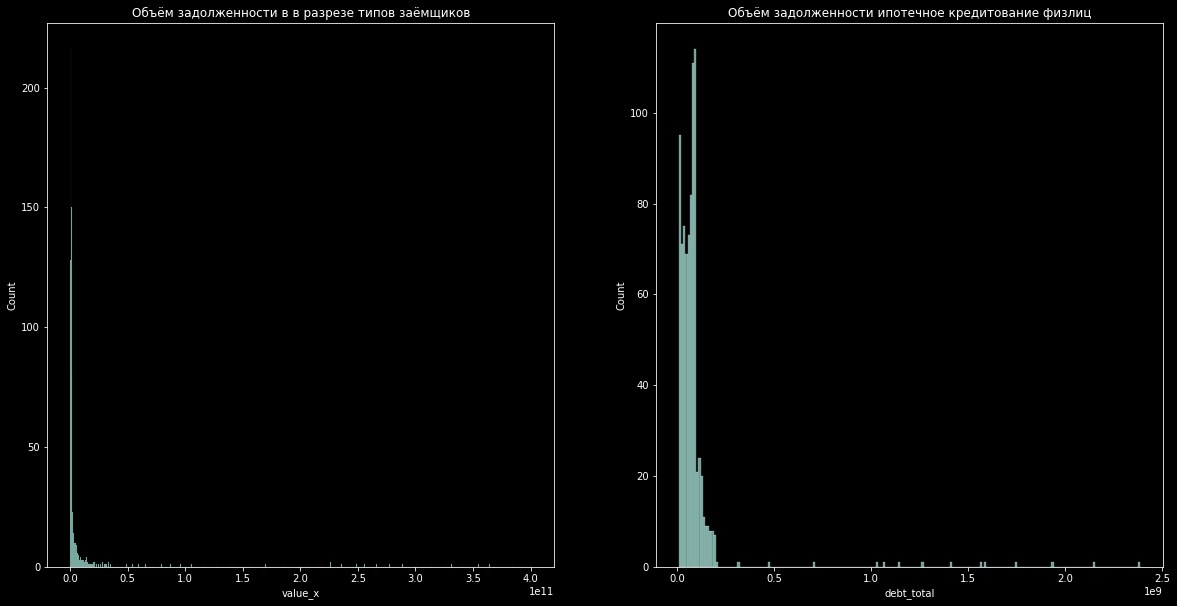

In [133]:
# Посмотим на объем задолженности
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
histplot  = sns.histplot(data = data['value_x'], ax=axes[0])
histplot.set_title('Объём задолженности в разрезе типов заёмщиков')
histplot  = sns.histplot(data = data['debt_total'], ax=axes[1])
histplot.set_title('Объём задолженности ипотечное кредитование физлиц')

Text(0.5, 1.0, 'Потребительские кредиты физлиц')

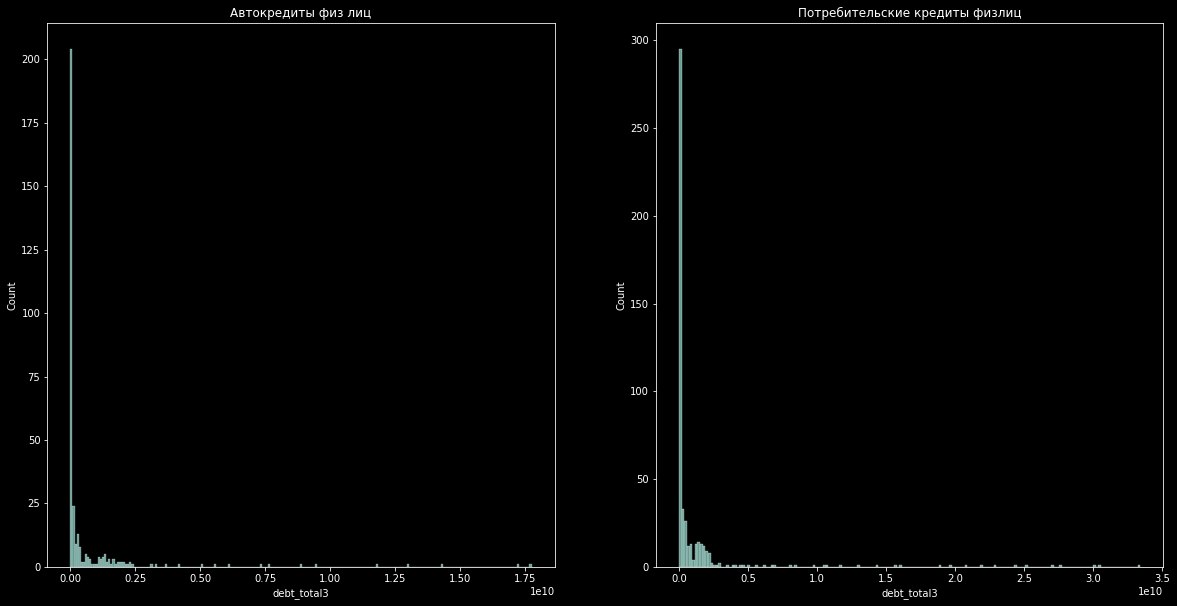

In [134]:
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
histplot  = sns.histplot(data = data[data['credits_type'] == 'автокредиты']['debt_total3'], ax=axes[0])
histplot.set_title('Автокредиты физ лиц')
histplot  = sns.histplot(data = data[data['credits_type'] == 'потребы']['debt_total3'], ax=axes[1])
histplot.set_title('Потребительские кредиты физлиц')

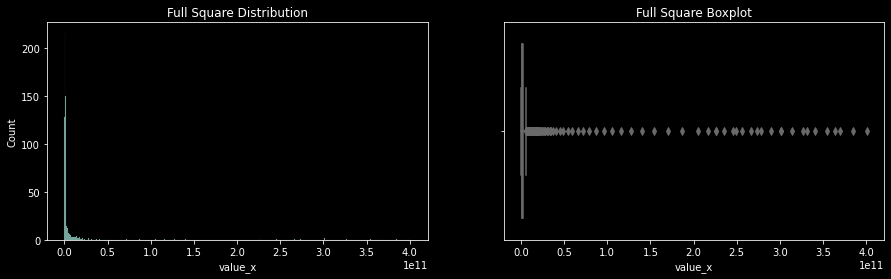

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='value_x', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=data, x='value_x', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

По график делать какие-то выводы бессмысленно.

In [148]:
# Сохраним данные в отдельный файл
submission = pd.read_excel('Submission.xlsx')
data.to_excel('Submission.xlsx')